In [1]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/seop/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/seop/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/seop/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
import numpy as np
import pandas as pd

import re
import string
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
df1 = pd.read_csv('df_1.csv', nrows=3)
df1

,Unnamed: 0,YEAR,COMP_NAME,CDESCR,label
0,0,1987,ENGINE AND ENGINE COOLING:COOLING SYSTEM:RADIA...,RADIATOR FAILED @ HIGHWAY SPEED OBSTRUCTING DR...,0
1,1,1992,"FUEL SYSTEM, GASOLINE:DELIVERY","FUEL LEAKED FROM FUEL TANK AREA, EMITTING STRO...",0
2,2,1994,POWER TRAIN:AUTOMATIC TRANSMISSION,SHIFTED INTO REVERSE VEHICLE JERKED VIOLENTLY....,0


In [6]:

df1 = pd.read_csv(r'df_1.csv', encoding='ISO-8859-1')
df2 = pd.read_csv(r'df_2.csv', encoding='ISO-8859-1')
df1.head()

,Unnamed: 0,YEAR,COMP_NAME,CDESCR,label
0,0,1987,ENGINE AND ENGINE COOLING:COOLING SYSTEM:RADIA...,RADIATOR FAILED @ HIGHWAY SPEED OBSTRUCTING DR...,0
1,1,1992,"FUEL SYSTEM, GASOLINE:DELIVERY","FUEL LEAKED FROM FUEL TANK AREA, EMITTING STRO...",0
2,2,1994,POWER TRAIN:AUTOMATIC TRANSMISSION,SHIFTED INTO REVERSE VEHICLE JERKED VIOLENTLY....,0
3,3,1987,"FUEL SYSTEM, GASOLINE:STORAGE:TANK ASSEMBLY",FUEL TANK ; LEAKS BECAUSE OF RUST GAS LEAK BY ...,0
4,4,1991,SEATS,"DRIVER SIDE SEAT FRAME BROKE IN TWO, CAUSING S...",0


In [7]:
df = pd.concat([df1,df2])
df = df.reset_index(drop=True)
df

,Unnamed: 0,YEAR,COMP_NAME,CDESCR,label
0,0,1987,ENGINE AND ENGINE COOLING:COOLING SYSTEM:RADIA...,RADIATOR FAILED @ HIGHWAY SPEED OBSTRUCTING DR...,0
1,1,1992,"FUEL SYSTEM, GASOLINE:DELIVERY","FUEL LEAKED FROM FUEL TANK AREA, EMITTING STRO...",0
2,2,1994,POWER TRAIN:AUTOMATIC TRANSMISSION,SHIFTED INTO REVERSE VEHICLE JERKED VIOLENTLY....,0
3,3,1987,"FUEL SYSTEM, GASOLINE:STORAGE:TANK ASSEMBLY",FUEL TANK ; LEAKS BECAUSE OF RUST GAS LEAK BY ...,0
4,4,1991,SEATS,"DRIVER SIDE SEAT FRAME BROKE IN TWO, CAUSING S...",0
...,...,...,...,...,...
1700768,700768,2016,UNKNOWN OR OTHER,On Tuesday September 13th 2022 morning around ...,0
1700769,700769,2016,VEHICLE SPEED CONTROL,On Tuesday September 13th 2022 morning around ...,0
1700770,700770,2018,UNKNOWN OR OTHER,What component or system failed or malfunction...,0
1700771,700771,2018,ELECTRICAL SYSTEM,What component or system failed or malfunction...,0


In [8]:
df['COMPNAME'] = df['COMP_NAME'].str.split(':').str[0]

In [9]:
df.drop(['Unnamed: 0','COMP_NAME'],axis = 1,inplace=True)


In [10]:
condition = (df['COMPNAME'] == 'ELECTRICAL SYSTEM') | (df['COMPNAME'] == 'POWER TRAIN') | (df['COMPNAME'] == 'AIR BAGS') | (df['COMPNAME'] == 'STEERING') | (df['COMPNAME'] == 'ENGINE')
temp_5 = df.loc[condition,:]


In [11]:
temp_5 = temp_5[temp_5['YEAR']>=2011 ]

In [12]:
temp_5

,YEAR,CDESCR,label,COMPNAME
686288,2011,TOOK POSSESSION OF 2011 KIA SORRENTO ON 2-18-2...,0,ELECTRICAL SYSTEM
686289,2011,TOOK POSSESSION OF 2011 KIA SORRENTO ON 2-18-2...,0,POWER TRAIN
692492,2011,I OWNED THE CAR FOR A WEEK. THERE WAS NO WARNI...,0,STEERING
697220,2011,WE RECENTLY PURCHASED A 2011 KIA SORENTO FRONT...,0,POWER TRAIN
697496,2011,TL*THE CONTACT OWNS A 2011 KIA SORENTO. THE VE...,0,ELECTRICAL SYSTEM
...,...,...,...,...
1700756,2015,2015 Ford Escape. Electronic automatic power s...,0,ELECTRICAL SYSTEM
1700762,2021,"When exiting the highway, I pushed on brake to...",0,ELECTRICAL SYSTEM
1700766,2021,"While driving the radio console( a/c, etc) and...",0,ELECTRICAL SYSTEM
1700767,2016,On Tuesday September 13th 2022 morning around ...,0,AIR BAGS


In [496]:
stop_words = ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
  'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 'doesn',
 'hadn',
 'hasn',
 "hasn't",
 'haven',
 'isn',
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 'won',
 'air',
 'bags',
'knee',
 'bag',
 'nor',
'vehicles',
'vehicle',
 'contact',
 'driver',
 'own',
 'owns',
 'driving',
 'recall',
 'vehicle',
 'takata',
 'airbag',
 'airbags',
 'personal',
 'serious',
 'volvo',
 'note',
 'general',
 'issue',
 'problem',
 'passenger',
 'accident',
 'mileage',
 'service',
 'part',
 'nhtsa',
 'ford',
 'honda',
 'hyundai',
 'toyota',
 'kia',
 'year',
 'years',
 'nissan',
 'may',
 'audi',
 'mdx',
 '₩',
 'ohio',
 'oklahoma',
 'west',
 'prsche',
 'follows',
 'comply',
 'cause','could','causing','become','recalling','affected','child','due',
 'front','side','benz','mercedes','always','april','ave','able','addition','almost','ago','along','also',
 'already','anyone','anything','area','asked','august','began','believe','bmw','bought','cannot','car','charge'
 'chevrolet','city','claim','consumer','corolla','daughter','determine','diagnostic','different',
 'done','drive','driven','drove','either','end','ended','enen','ever','every','experienced','experiencing',
 'february','feel','first','foia','foot','forward','freedom','frontal','get','getting','give','given','go',
 'going','got','hand','happen','happened','happens','heard','help','high','highway','home','hospital'
 ,'hour','however','imformation','imformed','january','jeep','july','june','know','known','le','least','left'
 , 'let','letter','lexus','like','list','made','major','make','making','letter','many','march','message','might',
 'mile','minute','model','matter','month',
 'mph','muc','mustang','must','new','aprnextil','numerous','number','old','one','online','order','own','owner',
 'passat','people','per','person','phone','picture','please','pursuant','ram','ran','really','red','redacted','remedy',
 'rental','result','right','say','said','saying','september','serviced','shop','silverado','since','situation','own','owner',
'son','soon','sr','suddenly','subaru','tell','thank','thing','think','three','told','total','totaled'
,'tree','tried','trying','twice','two','unable','unknown','volkswagen','week','well','went','wife','totaled'
,'within','without','would','writes','xxx','yet','blvd','even','warranty','replace','take' #이거 이후로는 빈도수로 줄임
,'vin','receive','tool','local','chevrolet','chrysler',]



In [497]:
rp = [
    ['came','come'],
    ['coming','come'],
    ['completed','complete'],
    ['approximately','approximate'],
    ['completely','complete'],
    ['completed','complete'],
    ['concerned','concern'],
    ['confirmed','confirm'],
    ['confirms','confirm'],
    ['covered','cover'],
    ['cracked','crack'],
    ['crashed','crash'],
    ['currently','current'],
    ['damaged','damage'],
    ['dash','dashboard'],
    ['day','date'],
    ['dealership','dealer'],
   
    ['defective','defect'],
    ['deployment','deploy'],
    ['deployed','deploy'],
    ['determined','determine'],
    ['diagnosed','diagnostic'],
    
    ['failed','failure'],
    ['fault','failure'],
    ['faulty','failure'],
   
    ['fixed','fix'],
    ['harness','hard'],
    ['headrest','head'],
    ['hitting','hit'],
    ['included','include'],
    ['including','include'],
    ['indicating','indicate'],
    
    ['indicated','indicate'],
    ['indicator','indicate'],
    ['injury','injured'],
    ['inspection','inspected'],
    ['looked','look'],
    ['needed','need'],
    ['noticed','notice'],
    ['notification','notified'],
    ['parked','park'],
    ['parking','park'],
    ['provided','provide'],
    ['purchased','purchase'],
    ['reasonable','reason'],
    ['regarding','regard'],
    
    ['received','receive'],
    ['receiving','receive'],
    ['repaired','repair'],
    ['replaced','replace'],
    
    ['replacement','replace'],
    ['safety','safe'],
    ['seems','see'],
    ['severe','several'],
    ['started','start'],
    ['starting','start'],
    ['stated','state'],
    ['stating','state'],
    ['stopped','stop'],
    ['taken','take'],
    ['taking','take'],
    
    ['took','take'],
    ['towed','tow'],
    ['turned','turn'],
    ['turning','turn'],
    ['used','use'],
    ['waiting','wait'],
    ['working','work'],
    
]






In [498]:
temp_5 = temp_5[temp_5['COMPNAME']=='AIR BAGS']

In [499]:
import time 

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

빈도수용 = []

def clean(doc):
    sentence=str(doc)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stop_words]
    stem_words= [lemmar.lemmatize(w) for w in filtered_words]
    
    tem = []
    for word in stem_words:
        for i,j in rp:
            if word == i:
                word = word.replace(i,j)
                break
        tem.append(word)
    빈도수용.append(set(tem))
    return tem
start = time.time()

print(time.time() - start)

2.5033950805664062e-05


In [500]:
tf_idf_vectorizer = TfidfVectorizer(tokenizer =clean,stop_words = stop_words,min_df = 0.01)
tf_idf_arr = tf_idf_vectorizer.fit_transform(temp_5['CDESCR'])



In [502]:
from collections import defaultdict
dic = defaultdict(int)

for l in 빈도수용:
    
    for i in l:
        dic[i]+=1

In [503]:
sorted(dic.items(),key=lambda x: -x[1])

[('not', 20788),
 ('failure', 12549),
 ('repair', 10916),
 ('dealer', 10752),
 ('manufacturer', 10593),
 ('state', 9895),
 ('time', 9666),
 ('notified', 8440),
 ('deploy', 8232),
 ('receive', 8074),
 ('light', 7727),
 ('part', 7333),
 ('available', 7123),
 ('campaign', 6579),
 ('reason', 5795),
 ('seat', 5736),
 ('amount', 4993),
 ('aware', 4840),
 ('exceeded', 4748),
 ('take', 4665),
 ('come', 4515),
 ('confirm', 4404),
 ('safe', 4079),
 ('need', 3950),
 ('warning', 3893),
 ('injured', 3861),
 ('unavailable', 3601),
 ('back', 3561),
 ('replace', 3552),
 ('contacted', 3460),
 ('approximate', 3442),
 ('fix', 3136),
 ('turn', 3117),
 ('report', 2947),
 ('crash', 2880),
 ('notice', 2819),
 ('still', 2701),
 ('hit', 2654),
 ('police', 2652),
 ('another', 2452),
 ('filed', 2443),
 ('work', 2442),
 ('date', 2411),
 ('called', 2383),
 ('sensor', 2345),
 ('indicate', 2340),
 ('system', 2335),
 ('illuminated', 2329),
 ('steering', 2305),
 ('stop', 2287),
 ('informed', 2272),
 ('diagnostic', 219

In [504]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [505]:
tfidf_df = pd.DataFrame(tf_idf_arr.toarray(),columns = tf_idf_vectorizer.get_feature_names())

In [507]:
# from collections import defaultdict
# dic = defaultdict(int)

# for col in tfidf_df.columns:
#     if len(col)>2:
#         dic[col] = tfidf_df[col].sum()
# dic= sorted(dic.items(),key=lambda x:-x[1])
# dic

In [508]:
# dic= sorted(dic.items(),key=lambda x:-x[1])
# dic

In [509]:
from sklearn.cluster import KMeans

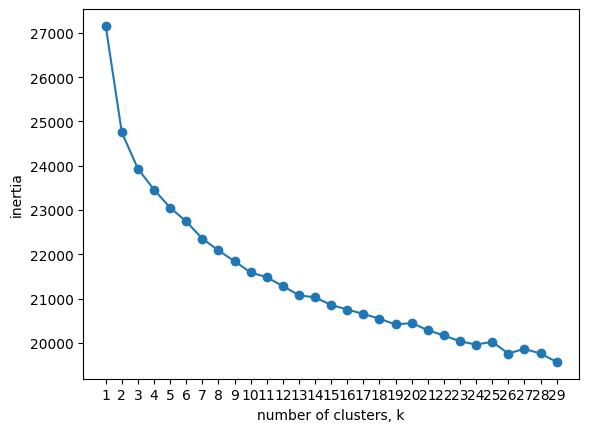

In [522]:
ks = range(1,30)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k,random_state=0)
    model.fit(tf_idf_arr) # tsne한 놈
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [513]:
m = TSNE(learning_rate = 1000,random_state=0)
tsne_features = m.fit_transform(pd.DataFrame(tf_idf_arr.toarray()))
tsne_features

array([[ 47.08549 , -44.75236 ],
       [ 12.949496,   2.015235],
       [  7.721465,  11.214114],
       ...,
       [ 17.452124, -13.387761],
       [-10.915693, -16.971827],
       [ 43.81197 ,  68.48888 ]], dtype=float32)

In [514]:
df_tsne = pd.DataFrame()
df_tsne['x'] = tsne_features[:,0]
df_tsne['y'] = tsne_features[:,1]

In [527]:
from sklearn.cluster import KMeans
kn = 13
cluster_model = KMeans(n_clusters=kn,max_iter=1000,random_state = 0)
cluster_model.fit(tf_idf_arr)

cluster_label = cluster_model.labels_
cluster_centers = cluster_model.cluster_centers_
temp_5['cluster_label'] = cluster_label

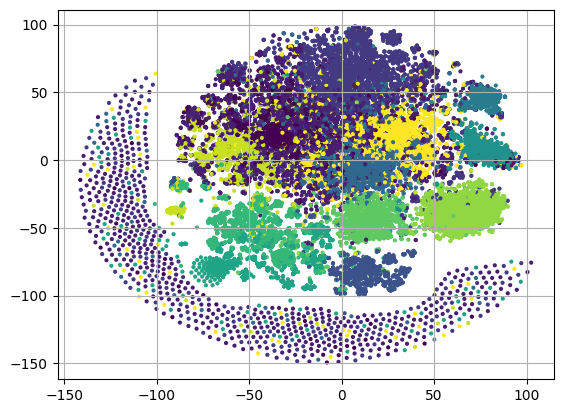

In [528]:
plt.scatter(np.array(tsne_features)[:,0], np.array(tsne_features)[:,1], c=cluster_label, s=4, cmap='viridis')
centers = cluster_model.cluster_centers_
plt.grid()
plt.show()

In [529]:
cluster_centers = cluster_model.cluster_centers_


def get_cluster_details(cluster_model,cluster_data,feature_names,clusters_num,top_n_features=10):
    
    cluster_details = {}
    #군집 중심점 별 할당된 워드 피처들의 거리값이 큰 순으로 구하기 위함.
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    for cluster_num in range(clusters_num):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num,:top_n_features]
        top_features = [feature_names[ind] for ind in top_feature_indexes]
        
        top_feature_values = cluster_model.cluster_centers_[cluster_num,top_feature_indexes].tolist()
        
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        

    return cluster_details
        
def print_cluster_details(cluster_details):
    for cluster_num,cluster_detail in cluster_details.items():
        print('###### Cluster {0}'.format(cluster_num))
        print('Top features : ',cluster_detail['top_features'])
        

In [531]:
feature_names = tf_idf_vectorizer.get_feature_names()
cluster_details = get_cluster_details(cluster_model = cluster_model,cluster_data= temp_5['CDESCR'],
                                     feature_names = feature_names,clusters_num=kn,top_n_features=20)
print_cluster_details(cluster_details)

###### Cluster 0
Top features :  ['fix', 'not', 'dealer', 'still', 'safe', 'time', 'want', 'wait', 'need', 'light', 'back', 'notice', 'available', 'come', 'seat', 'long', 'date', 'recalled', 'called', 'keep']
###### Cluster 1
Top features :  ['not', 'safe', 'dealer', 'time', 'defect', 'repair', 'need', 'information', 'date', 'system', 'work', 'regard', 'back', 'wait', 'still', 'purchase', 'light', 'inflator', 'called', 'concern']
###### Cluster 2
Top features :  ['deploy', 'hit', 'head', 'not', 'damage', 'impact', 'collision', 'stop', 'rear', 'injured', 'truck', 'involved', 'brake', 'road', 'traveling', 'speed', 'back', 'turn', 'lane', 'door']
###### Cluster 3
Top features :  ['distribution', 'disconnect', 'manufacturer', 'repair', 'not', 'notified', 'campaign', 'exceeded', 'state', 'amount', 'reason', 'available', 'unavailable', 'failure', 'time', 'aware', 'confirm', 'contacted', 'dealer', 'located']
###### Cluster 4
Top features :  ['seat', 'sensor', 'light', 'not', 'belt', 'dealer',

In [411]:
for i in range(kn):
    temp_5[temp_5['cluster_label'] == i].to_csv(f'comp_cluster{i}.csv')

In [94]:
tf_idf_vectorizer.get_feature_names()

['abl',
 'also',
 'amount',
 'anoth',
 'approxim',
 'avail',
 'awar',
 'back',
 'bag',
 'belt',
 'brake',
 'call',
 'came',
 'campaign',
 'car',
 'come',
 'concern',
 'confirm',
 'control',
 'crash',
 'damag',
 'day',
 'dealer',
 'dealership',
 'defect',
 'deploy',
 'diagnos',
 'disconnect',
 'distribut',
 'drive',
 'end',
 'even',
 'exceed',
 'experienc',
 'fail',
 'failur',
 'file',
 'fix',
 'get',
 'go',
 'happen',
 'head',
 'hit',
 'howev',
 'illumin',
 'impact',
 'indic',
 'inform',
 'injuri',
 'left',
 'light',
 'like',
 'local',
 'made',
 'make',
 'manufactur',
 'medic',
 'merced',
 'mile',
 'month',
 'mph',
 'need',
 'not',
 'notic',
 'notif',
 'notifi',
 'number',
 'one',
 'polic',
 'provid',
 'rear',
 'reason',
 'recal',
 'receiv',
 'remedi',
 'repair',
 'replac',
 'report',
 'requir',
 'right',
 'safeti',
 'said',
 'say',
 'seat',
 'sensor',
 'sever',
 'sinc',
 'speed',
 'start',
 'state',
 'steer',
 'still',
 'stop',
 'sustain',
 'system',
 'taken',
 'time',
 'told',
 'took